In [1]:
import os
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.under_sampling import RandomUnderSampler

# supress warnings
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

# configure pandas
pd.set_option('display.max_columns', None)

In [6]:
# load data
df_train = pd.read_csv("../data/train.csv")
df_test = pd.read_csv("../data/test.csv")

target_col = 'Class'

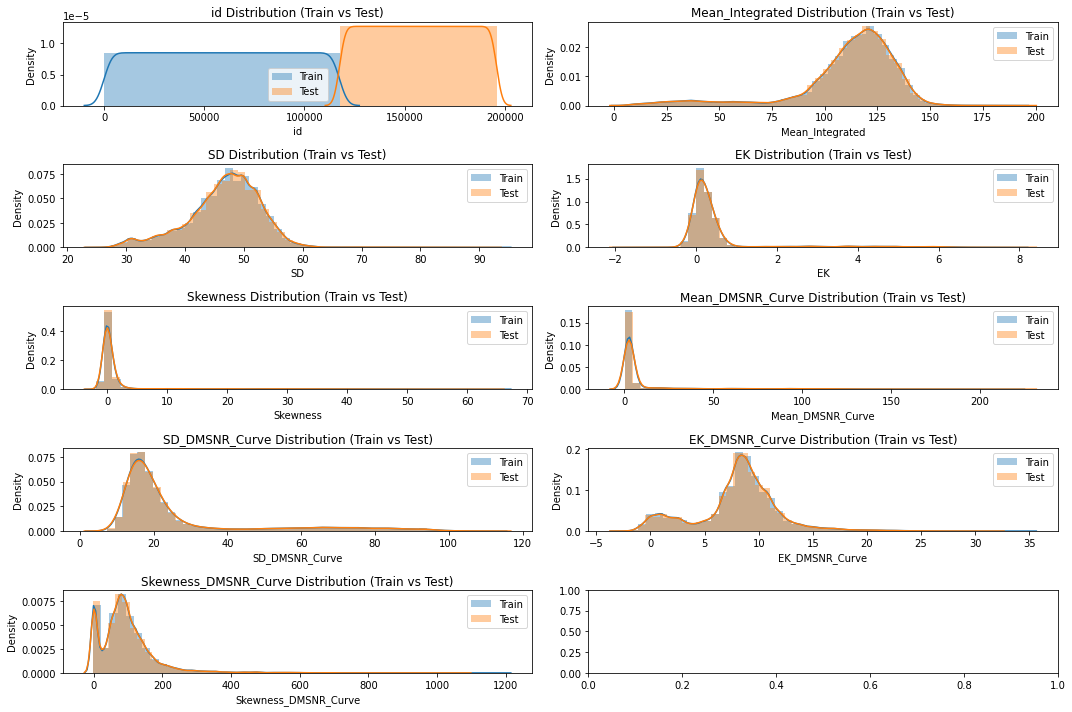

In [3]:
# EDA
# 1. compare distributions
n_cols = 2
n_rows = (len(df_test.columns) - 1) // n_cols + 1

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 10))

for i, var_name in enumerate(df_test.columns.tolist()):
    row = i // n_cols
    col = i % n_cols

    ax = axes[row, col]
    sns.distplot(df_train[var_name], kde=True, ax=ax, label='Train')
    sns.distplot(df_test[var_name], kde=True, ax=ax, label='Test')
    
    ax.set_title(f'{var_name} Distribution (Train vs Test)')
    ax.legend()

plt.tight_layout()
plt.show()

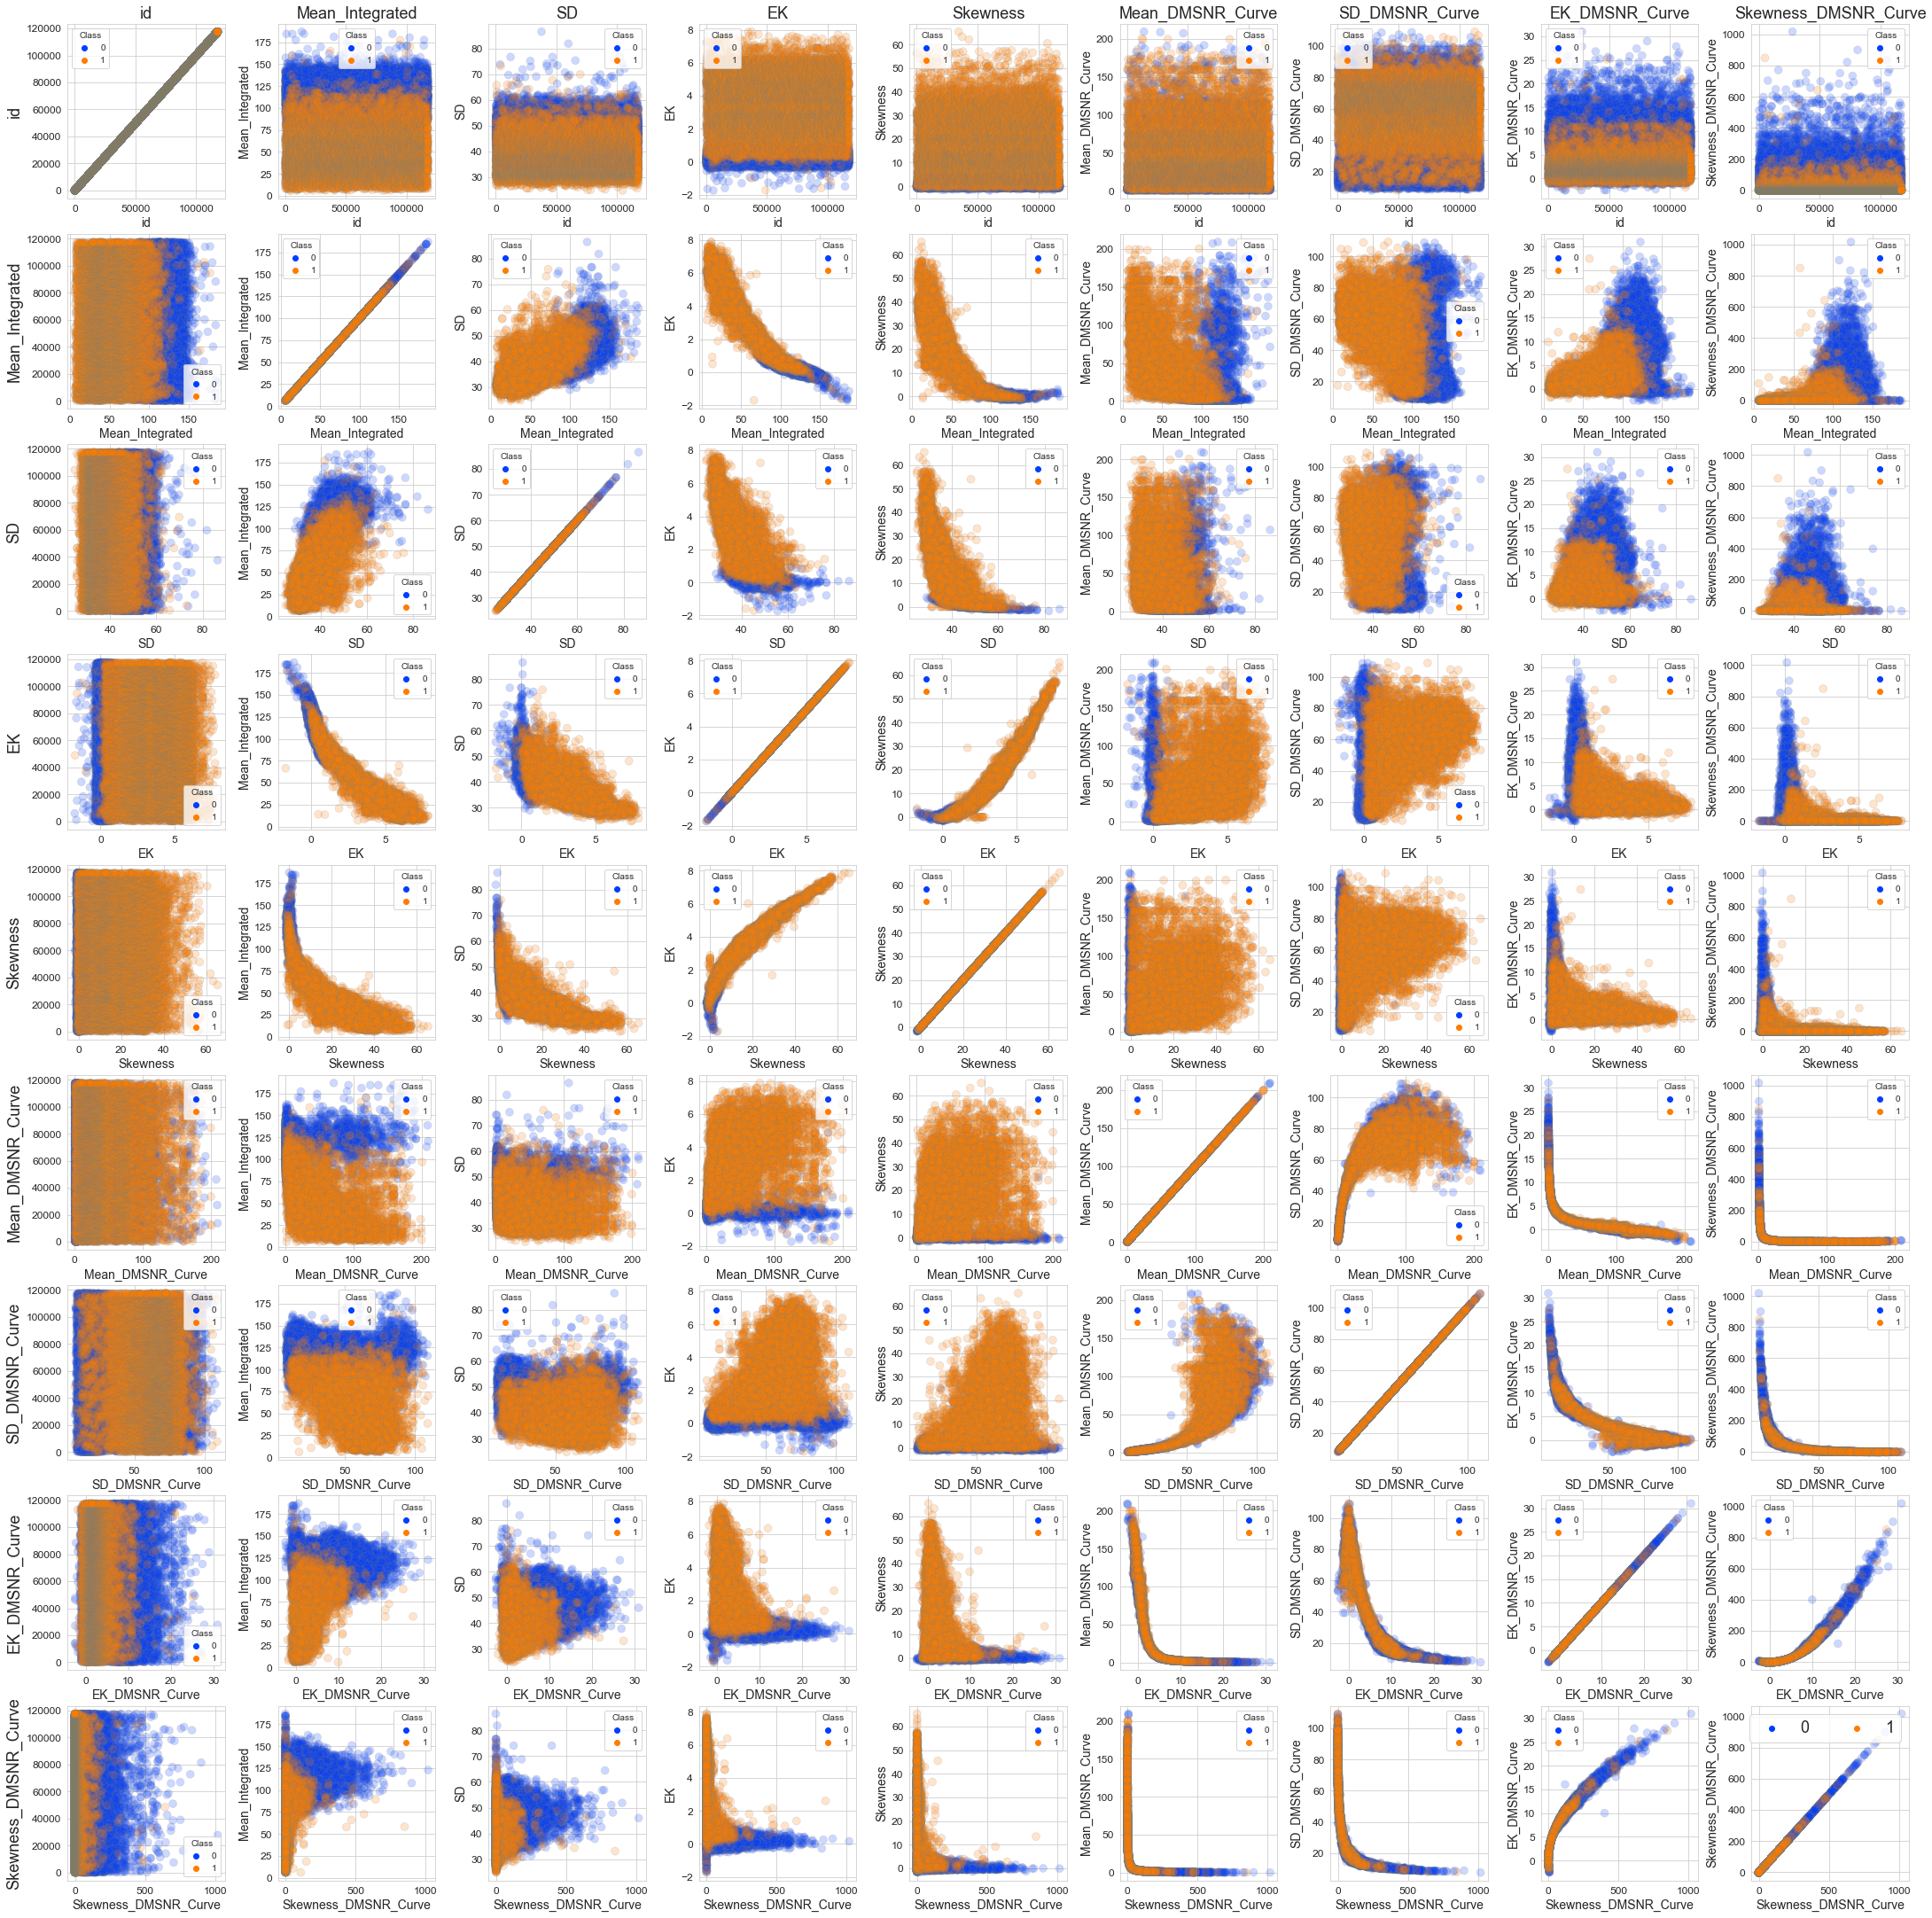

In [8]:
# plot scatter matrix with target
def plot_scatter_matrix(df, target_col, drop_cols=[], size=30):
    # sns.pairplot()
    
    sns.set_style('whitegrid')
    cols = df.columns.drop([target_col] + drop_cols)
    fig, axes = plt.subplots(len(cols), len(cols), figsize=(size, size), sharex=False, sharey=False)

    for i, col in enumerate(cols):
        for j, col_ in enumerate(cols):
            axes[i,j].set_xlabel(f'{col}', fontsize=14)
            axes[i,j].set_ylabel(f'{col_}', fontsize=14)

            # Plot the scatterplot
            sns.scatterplot(data=df, x=col, y=col_, hue=target_col, ax=axes[i,j],
                            s=80, edgecolor='gray', alpha=0.2, palette='bright')

            axes[i,j].tick_params(axis='both', which='major', labelsize=12)

            if i == 0:
                axes[i,j].set_title(f'{col_}', fontsize=18)
            if j == 0:
                axes[i,j].set_ylabel(f'{col}', fontsize=18)

    plt.tight_layout(pad=0.5, h_pad=0.5, w_pad=0.5)
    plt.legend(loc='upper right', ncol=5, fontsize=18)
    plt.show()
    
sampling_strategy = 0.5
rus = RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=42)
X_train_res, y_train_res = rus.fit_resample(df_train.drop(target_col, axis=1), df_train[target_col])
plot_scatter_matrix(pd.concat([X_train_res, y_train_res], axis=1), 'Class')

del X_train_res, y_train_res, rus

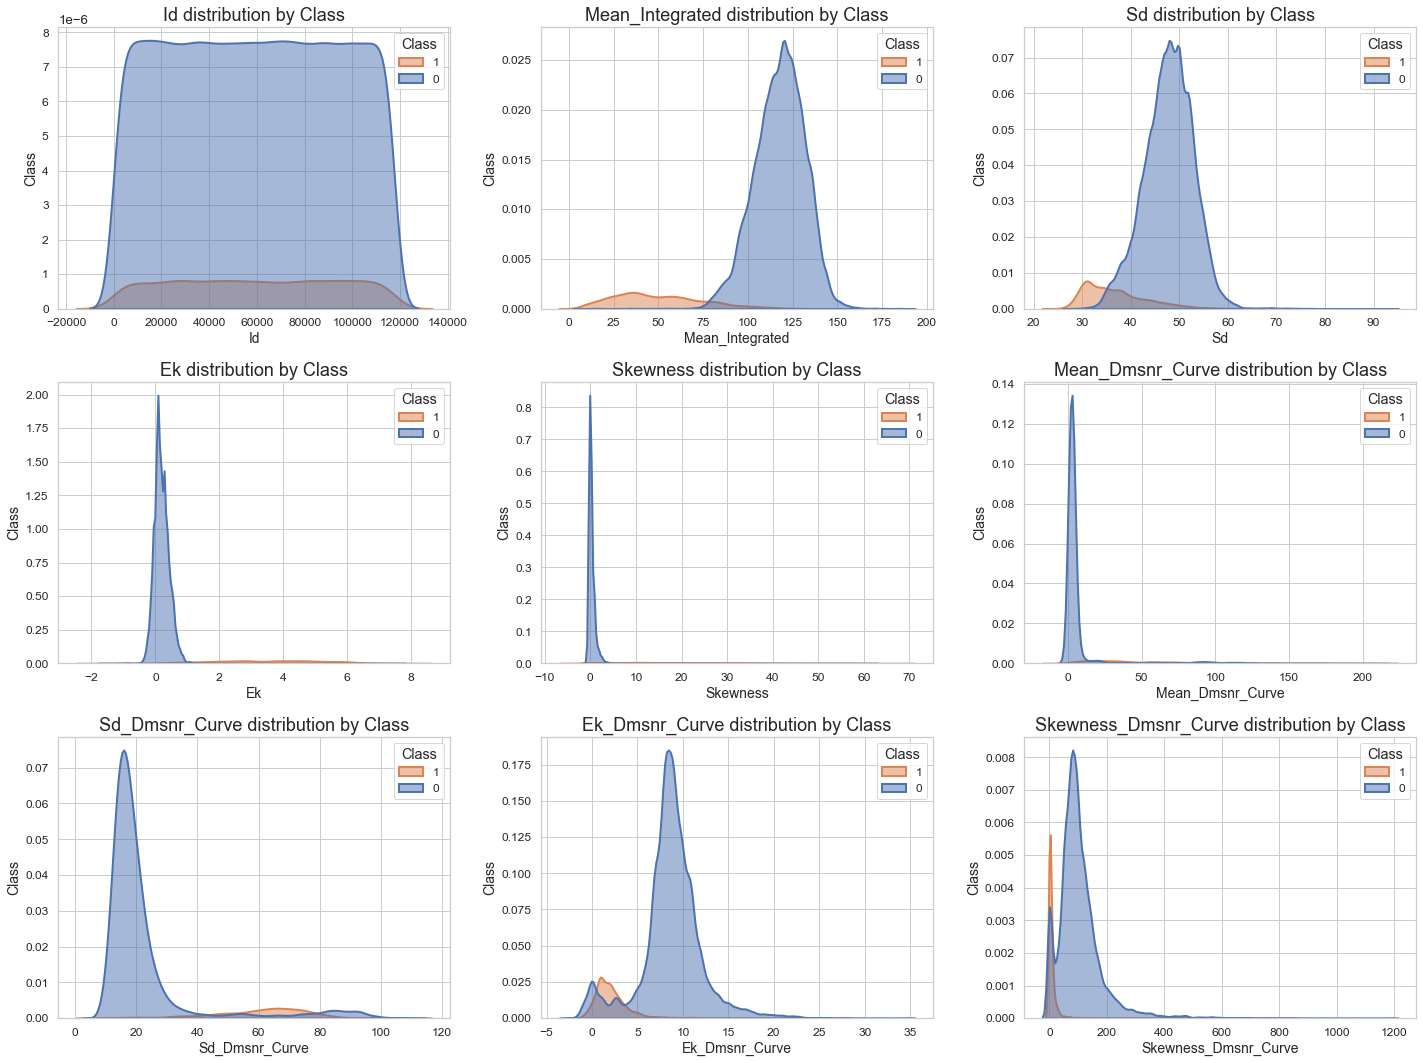

In [10]:
# kernel density plot
num_cols = 3
num_rows = (len(df_test.columns) - 1) // num_cols + 1
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 5*num_rows))
sns.set(font_scale=1.2, style='whitegrid')

for i, col_name in enumerate(df_test.columns):
    if col_name != target_col:
        ax = axes[i // num_cols, i % num_cols]
        sns.kdeplot(
            data=df_train, 
            x=col_name, 
            hue=target_col,
            ax=ax,
            fill=True,
            alpha=0.5,
            linewidth=2
        )

        ax.set_title(f'{col_name.title()} distribution by {target_col.title()}', fontsize=18)
        ax.set_xlabel(col_name.title(), fontsize=14)
        ax.set_ylabel(target_col.title(), fontsize=14)
        ax.tick_params(axis='both', which='major', labelsize=12)
        ax.legend([1, 0], title=target_col.title(), fontsize=12)

plt.tight_layout()
plt.show()

<AxesSubplot:>

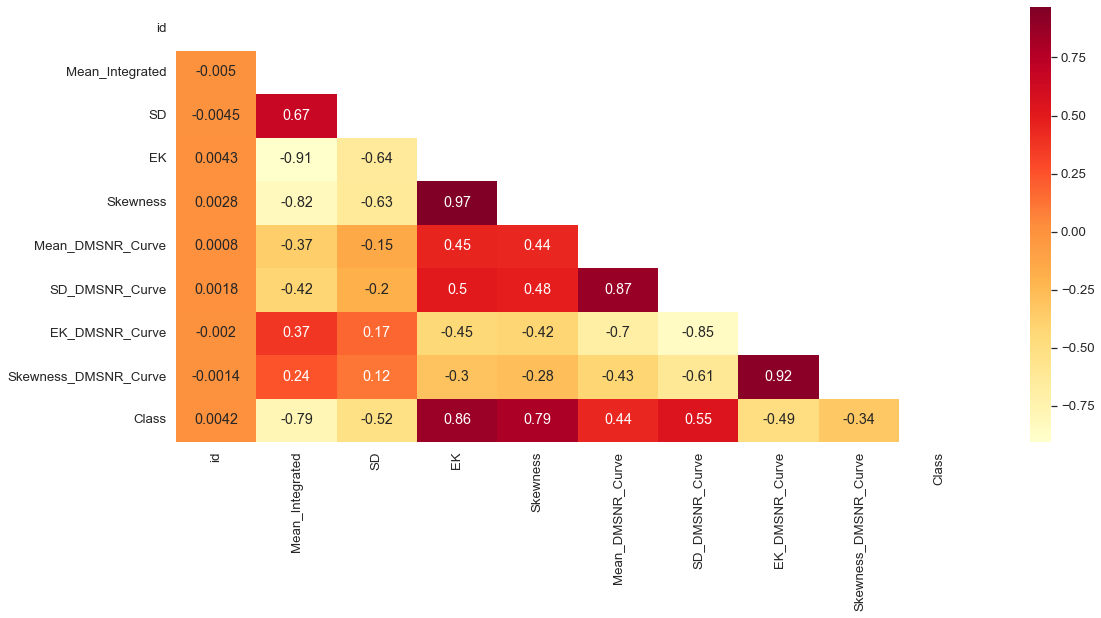

In [11]:
## correlations
plt.figure(figsize=(18, 8))
mask = np.triu(np.ones_like(df_train.corr()))
sns.heatmap(df_train.corr(), cmap='YlOrRd', annot=True, mask=mask)